<h1 style = "text-align:center; font-size: 36px"> Sistemas Inteligentes </h1>
<a href="https://github.com/MiguelRamosLop">
<img src="FotoMiguel.JPG" title = "Miguel Ramos López 21937215" alt="Miguel Ramos López" width="100" height="100" style="float:left;vertical-alig:middle">
<img src="uem.png" title= "M23"alt="UE" width="105" height="105" style="float:right;vertical-alig:middle">

# TF - IDF

In [57]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import IPython.display as display
from PIL import Image

Creamos dos documentos de prueba con frases muy sencillas

In [58]:
docA = 'la blanca lechuza es blanca como la blanca nieve'

In [59]:
docB = 'es malo el partido como malo es el resultado'

A priori, haciendo las cuentas a mano obtendríamos un resultado parecido a este:

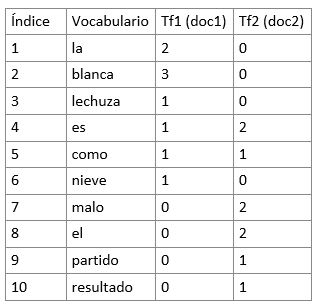

In [60]:
display.display(Image.open('Captura.JPG'))

Usamos la estrategia 'Bag of words': Se usa para crear un vocabulario. Se identifican los términos de los documentos de la colección. D = {d1, d2, ..., dn}  Y si un término aparece en alguno de los documentos, pasa directamente a formar parte del vocabulario. V = {t1, t2, ..., tm}. 

In [61]:
bagA = docA.split(' ')

In [62]:
bagB = docB.split(' ')

In [63]:
tabla = set(bagA).union(set(bagB))

In [64]:
print(tabla)

{'la', 'blanca', 'malo', 'resultado', 'nieve', 'es', 'el', 'partido', 'lechuza', 'como'}


Como vemos obtenemos las palabras de los dos documentos pero desordenadas y repetidas una sola vez.

In [65]:
palabrasA = dict.fromkeys(tabla, 0)
for p in bagA:
    palabrasA[p] += 1

In [66]:
palabrasB = dict.fromkeys(tabla, 0)
for p in bagB:
    palabrasB[p] += 1

In [67]:
print(palabrasA)

{'la': 2, 'blanca': 3, 'malo': 0, 'resultado': 0, 'nieve': 1, 'es': 1, 'el': 0, 'partido': 0, 'lechuza': 1, 'como': 1}


In [68]:
print(palabrasB)

{'la': 0, 'blanca': 0, 'malo': 2, 'resultado': 1, 'nieve': 0, 'es': 2, 'el': 2, 'partido': 1, 'lechuza': 0, 'como': 1}


Observamos que ahora si que obtenemos los vectores (repeticiones de las palabras de cada doc) iguales a los vectores que obtuvimos como resultado haciendo la tabla a mano.

Una vez que ya tenemos todo esto calibrado, simplemente calculamos el TF y el TF-IDF.

# TF

Comenzamos con el TF, es decir, la frecuencia de una palabra en un documento concreto. Si por ejemplo quisiéramos saber la TF de la palabra blanca en el documento A simplemente dividimos las ocurrencias entre el número de palabras con las que la frase cuenta.

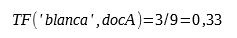

In [69]:
display.display(Image.open('Captura_TF.JPG'))

In [70]:
def calculateTF (wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

In [71]:
tfA = calculateTF(palabrasA, bagA)

In [72]:
tfB = calculateTF(palabrasB, bagB)

In [73]:
print(tfA)

{'la': 0.2222222222222222, 'blanca': 0.3333333333333333, 'malo': 0.0, 'resultado': 0.0, 'nieve': 0.1111111111111111, 'es': 0.1111111111111111, 'el': 0.0, 'partido': 0.0, 'lechuza': 0.1111111111111111, 'como': 0.1111111111111111}


Si queremos comprobar, nos damos cuenta que 'blanca' : 0.33333333333 es el mismo resultado que habíamos obtenido haciéndolo a mano en la imagen anterior, corroborando que está bien calculado.

In [74]:
print(tfB)

{'la': 0.0, 'blanca': 0.0, 'malo': 0.2222222222222222, 'resultado': 0.1111111111111111, 'nieve': 0.0, 'es': 0.2222222222222222, 'el': 0.2222222222222222, 'partido': 0.1111111111111111, 'lechuza': 0.0, 'como': 0.1111111111111111}


# IDF

Ahora hacemos exactamente lo mismo pero con el IDF. 

In [75]:
def calculateIDF (docs):
    import math
    n = len(docs)
    idfDict = dict.fromkeys(docs[0].keys(),0)
    for document in docs:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(n / float(val))
        
    return idfDict

In [76]:
idfs = calculateIDF([palabrasA, palabrasB])

In [77]:
print(idfs)

{'la': 0.6931471805599453, 'blanca': 0.6931471805599453, 'malo': 0.6931471805599453, 'resultado': 0.6931471805599453, 'nieve': 0.6931471805599453, 'es': 0.0, 'el': 0.6931471805599453, 'partido': 0.6931471805599453, 'lechuza': 0.6931471805599453, 'como': 0.0}


# TF - IDF

Simplemete para calcular el TF-IDF multiplicamos el TF por el IDF.

In [78]:
def calculateTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [79]:
tfidfA = calculateTFIDF(tfA, idfs)

In [80]:
tfidfB = calculateTFIDF(tfB, idfs)

In [81]:
df = pd.DataFrame([tfidfA, tfidfB])

In [82]:
df

,la,blanca,malo,resultado,nieve,es,el,partido,lechuza,como
0,0.154033,0.231049,0.000000,0.000000,0.077016,0.0,0.000000,0.000000,0.077016,0.0
1,0.000000,0.000000,0.154033,0.077016,0.000000,0.0,0.154033,0.077016,0.000000,0.0


En cambio, todo este proceso se podría haber hecho usando una librería de Sklearn que hace esto mismo de forma muy sencilla.

In [85]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([docA, docB])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = feature_names)

In [86]:
df

,blanca,como,el,es,la,lechuza,malo,nieve,partido,resultado
0,0.749707,0.177808,0.00000,0.177808,0.499805,0.249902,0.00000,0.249902,0.00000,0.00000
1,0.000000,0.200994,0.56498,0.401988,0.000000,0.000000,0.56498,0.000000,0.28249,0.28249


Obteniendo con solo 6 líneas el mismo resultado que obtubimos con todo el proceso antes. 